In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv(r'C:\Users\ATHARVA\Documents\coding practice\DMG Bonus\Bonus-assigment-3\zomatoData.csv',sep=",")

In [64]:
data.head()

,Name,Address,Phone,Rating,AvgCost,Known For,Popular Dishes,Cuisine,Reviews
0,Pizza Hut,"17 & 18, Corner Market, Malviya Nagar, New Delhi",918929647587,3.7,800,Casual Seating Area|Prompt Service|Reasonable ...,NaN,Pizza|Fast Food|Pasta|Beverages|Desserts|,Dining|Delivery|Casual Seating Area|Prompt Ser...
1,RollsKing,"Shop 2, 10/127, Malviya Nagar, New Delhi",919560101636,3.9,300,Pocket Friendly|Tasty|Contactless Delivery|Bes...,NaN,Rolls|Fast Food|North Indian|Beverages|,Dining|Delivery|Pocket Friendly|Tasty|Contactl...
2,Punjabi Angithi,"84, Ground Floor, Left Corner, Behind Hero Sho...",911149952492,4.0,200,Fast Delivery Service|Cute Packaging|Food Pres...,Chilly Momo|Veg Noodles|Dal|Momos|,North Indian|Chinese|Rolls|Momos|Street Food|P...,Chilly Momo|Veg Noodles|Dal|Momos|Fast Deliver...
3,Chicago Pizza,"8-A, Hauz Khas Village, New Delhi",919540937301,3.7,700,Comforting Atmosphere|Spill Proof Packaging|Fr...,Paneer Delight Pizza|Chicago Pizza|Pizzas|Drink|,Pizza|Fast Food|,Dining|Delivery|Paneer Delight Pizza|Chicago P...
4,BOX8 - Desi Meals,"F5, Ground Floor, Gautam Nagar, Gulmohar Park ...",918068172526,4.3,250,Customizable Food|Good Taste|Elaborate Menu|Fr...,NaN,North Indian|Biryani|Desserts|,Customizable Food|Good Taste|Elaborate Menu|Fr...


In [65]:
from sklearn.preprocessing import MinMaxScaler

data['AvgCost'] = MinMaxScaler().fit_transform(data['AvgCost'].values.reshape(-1,1))
data['Rating'] = MinMaxScaler().fit_transform(data['Rating'].values.reshape(-1,1))

<AxesSubplot:xlabel='Rating', ylabel='AvgCost'>

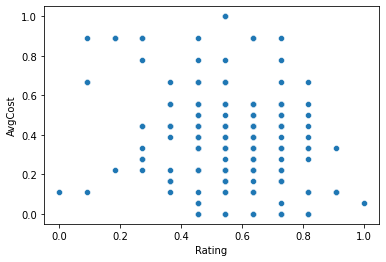

In [66]:
import seaborn as sns
sns.scatterplot(x="Rating",y="AvgCost",data=data)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            201 non-null    object 
 1   Address         201 non-null    object 
 2   Phone           201 non-null    int64  
 3   Rating          201 non-null    float64
 4   AvgCost         201 non-null    float64
 5   Known For       161 non-null    object 
 6   Popular Dishes  107 non-null    object 
 7   Cuisine         175 non-null    object 
 8   Reviews         178 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 14.3+ KB


In [68]:
data2 = data.drop(['Name','Address','Phone','Known For','Cuisine','Reviews','Popular Dishes'],axis=1)

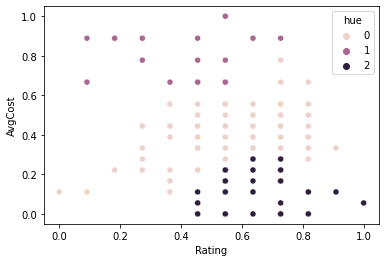

In [69]:
from sklearn.cluster import AgglomerativeClustering

hr = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hr.fit_predict(data2)

hr.labels_
data2['hue'] = hr.labels_

sns.scatterplot(x="Rating",y="AvgCost",hue="hue",data=data2)
plt.show()

In [70]:
data['Reviews'] = data['Reviews'].fillna('')

list_of_reviews = data['Reviews'].tolist()
sample_review = []

for i in range(len(list_of_reviews)):
    if list_of_reviews[i] != np.nan:
        sample_review.append(list_of_reviews[i].split('|'))
        
for i in range(len(sample_review)):
    for j in range(len(sample_review[i])):
        sample_review[i][j] = sample_review[i][j].strip()
    


In [71]:
data['Cuisine'] = data['Cuisine'].fillna('')

list_of_reviews = data['Cuisine'].tolist()
sample_review = []

for i in range(len(list_of_reviews)):
    if list_of_reviews[i] != np.nan:
        sample_review.append(list_of_reviews[i].split('|'))
        
for i in range(len(sample_review)):
    for j in range(len(sample_review[i])):
        sample_review[i][j] = sample_review[i][j].strip()

In [72]:
dict = {}

for i in range(len(sample_review)) : 
    for j in range(len(sample_review[i])) : 
        if sample_review[i][j] in dict : 
            dict[sample_review[i][j]] += 1
        else : 
            dict[sample_review[i][j]] = 1
            
print(dict)

{'Pizza': 24, 'Fast Food': 86, 'Pasta': 9, 'Beverages': 66, 'Desserts': 46, '': 201, 'Rolls': 23, 'North Indian': 91, 'Chinese': 56, 'Momos': 20, 'Street Food': 46, 'Biryani': 29, 'South Indian': 34, 'Mithai': 13, 'Wraps': 7, 'Burger': 30, 'Bakery': 8, 'Tea': 1, 'Sandwich': 14, 'Mughlai': 24, 'Kebab': 14, 'Hyderabadi': 12, 'Healthy Food': 5, 'Salad': 5, 'Coffee': 9, 'Lucknowi': 3, 'Sichuan': 1, 'Continental': 4, 'American': 2, 'Tibetan': 1, 'Maharashtrian': 3, 'Andhra': 6, 'Cafe': 4, 'Asian': 2, 'Shake': 4, 'Italian': 2, 'Seafood': 2, 'Kerala': 2, 'Ice Cream': 3, 'Mexican': 1, 'Juices': 1}


In [73]:
for i in dict.keys() : 
    data[i] = np.zeros(len(data))
    
for i in range(len(sample_review)) :
    for j in range(len(sample_review[i])) : 
        data.loc[i,sample_review[i][j]] = 1

In [76]:
data['Rolls'].value_counts()

0.0    178
1.0     23
Name: Rolls, dtype: int64